In [ ]:
from google.colab import files
uploaded = files.upload()

Saving CarPrice_Assignment.csv to CarPrice_Assignment.csv


In [ ]:
import io
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
#row와 column의 생략 없이 모든 row와 column을 출력
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

#Data Loading

In [ ]:
cars = pd.read_csv(io.BytesIO(uploaded['CarPrice_Assignment.csv']))

#Explanatory Data Analysis

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

There are no null values in the dataset

In [ ]:
cars.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,enginetype,cylindernumber,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,64.1,48.8,2548,dohc,four,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,65.5,52.4,2823,ohcv,six,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,66.2,54.3,2337,ohc,four,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,66.4,54.3,2824,ohc,five,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [ ]:
cars['symboling'].astype('category').value_counts()
#astype('category')를 사용하지 않아도 결과가 똑같이 출력되길래 찾아봤더니
#카테고리형 데이터를 이용하면 반복된 데이터를 코드화하여 데이터의 사이즈를 줄여서 메모리 사용량이 줄어들고 
#데이터 처리 속도가 빨라집니다
#이러한 이유로 사용하는 것 같음

0     67
1     54
2     32
3     27
-1    22
-2     3
Name: symboling, dtype: int64

In [ ]:
cars['aspiration'].astype('category').value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

In [ ]:
cars['drivewheel'].astype('category').value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

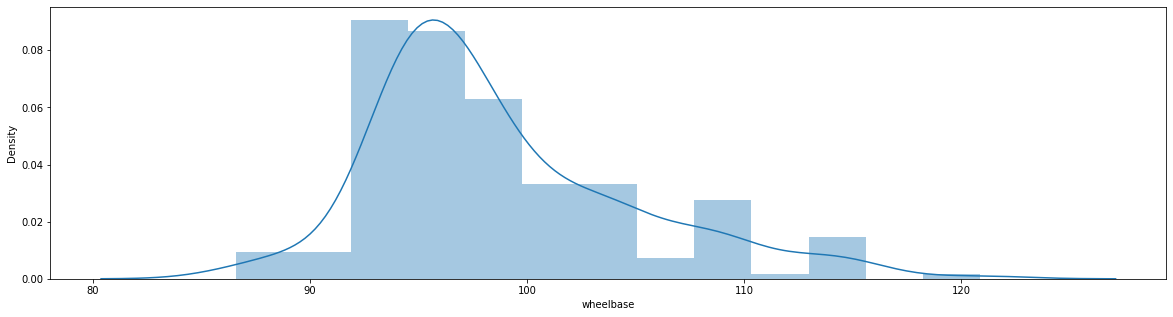

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(cars['wheelbase'])
plt.show()

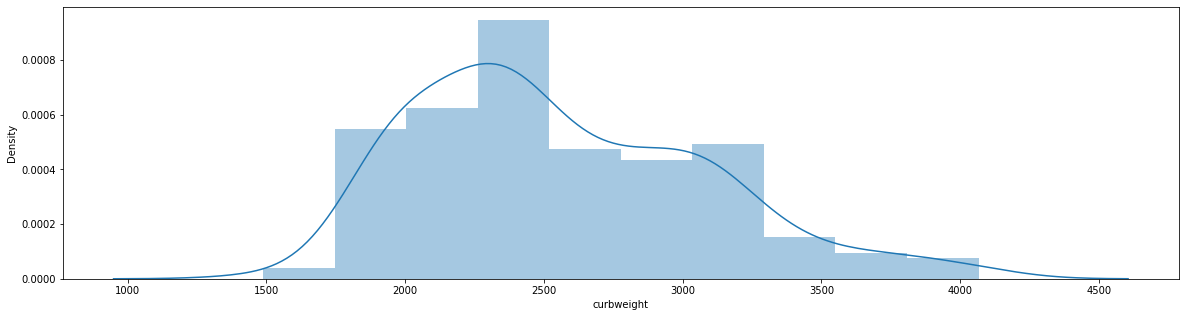

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(cars['curbweight'])
plt.show()

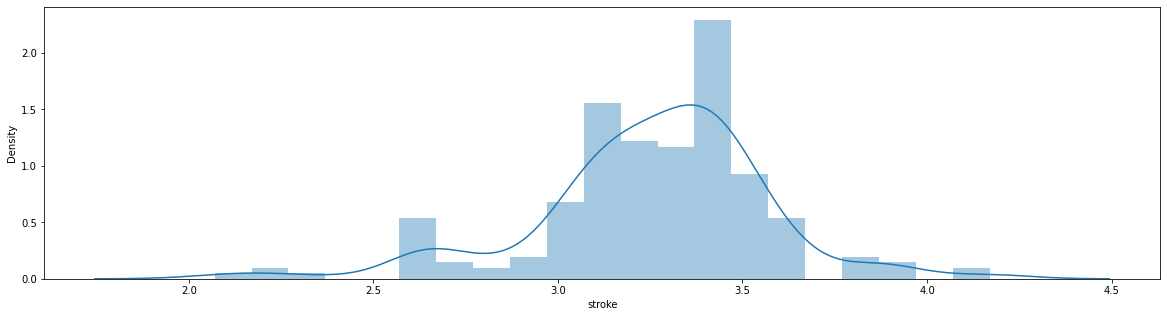

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(cars['stroke'])
plt.show()

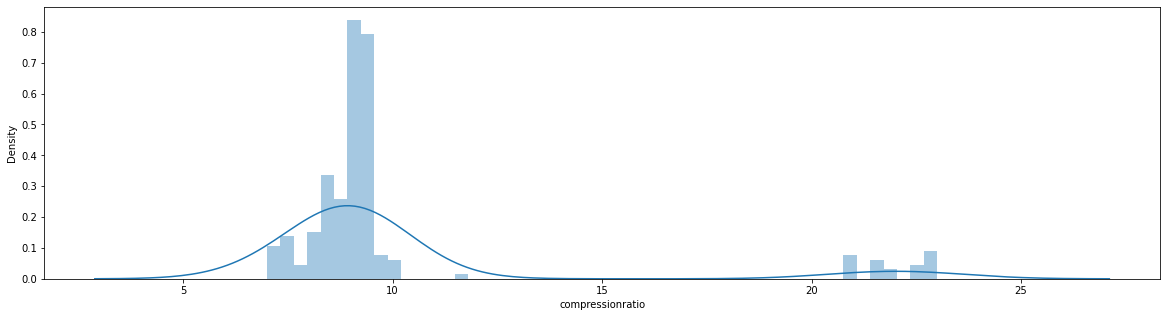

In [ ]:
plt.figure(figsize=(20,5))
sns.distplot(cars['compressionratio'])
plt.show()

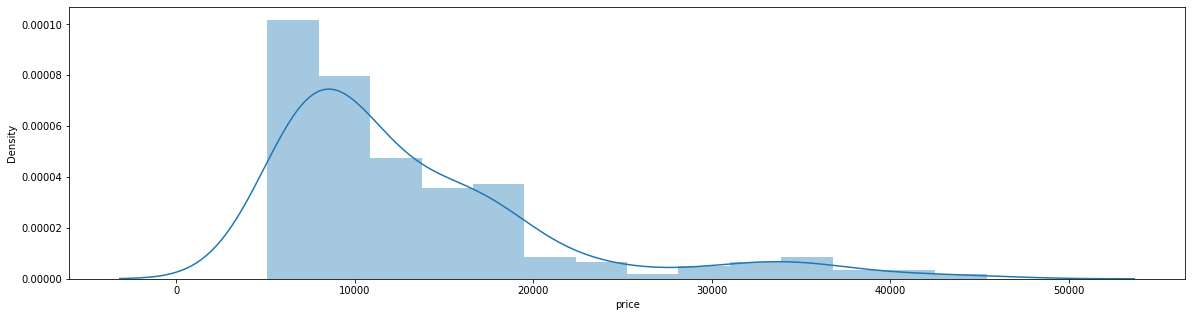

In [ ]:
plt.figure(figsize = (20, 5))
sns.distplot(cars['price'])
plt.show()

In [ ]:
cars_numeric = cars.select_dtypes(include = ['float', 'int'])
#all numeric(float or int) variables in the dataset
cars_numeric.head()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


Even 'symboling' is numeric(int), we'd rather treat it as categorical variable because there are only 6 discrete values in 'symboling'. Also we'll take 'car_ID' out.

In [ ]:
cars_numeric = cars_numeric.drop(['symboling', 'car_ID'], axis = 1)
cars_numeric.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0


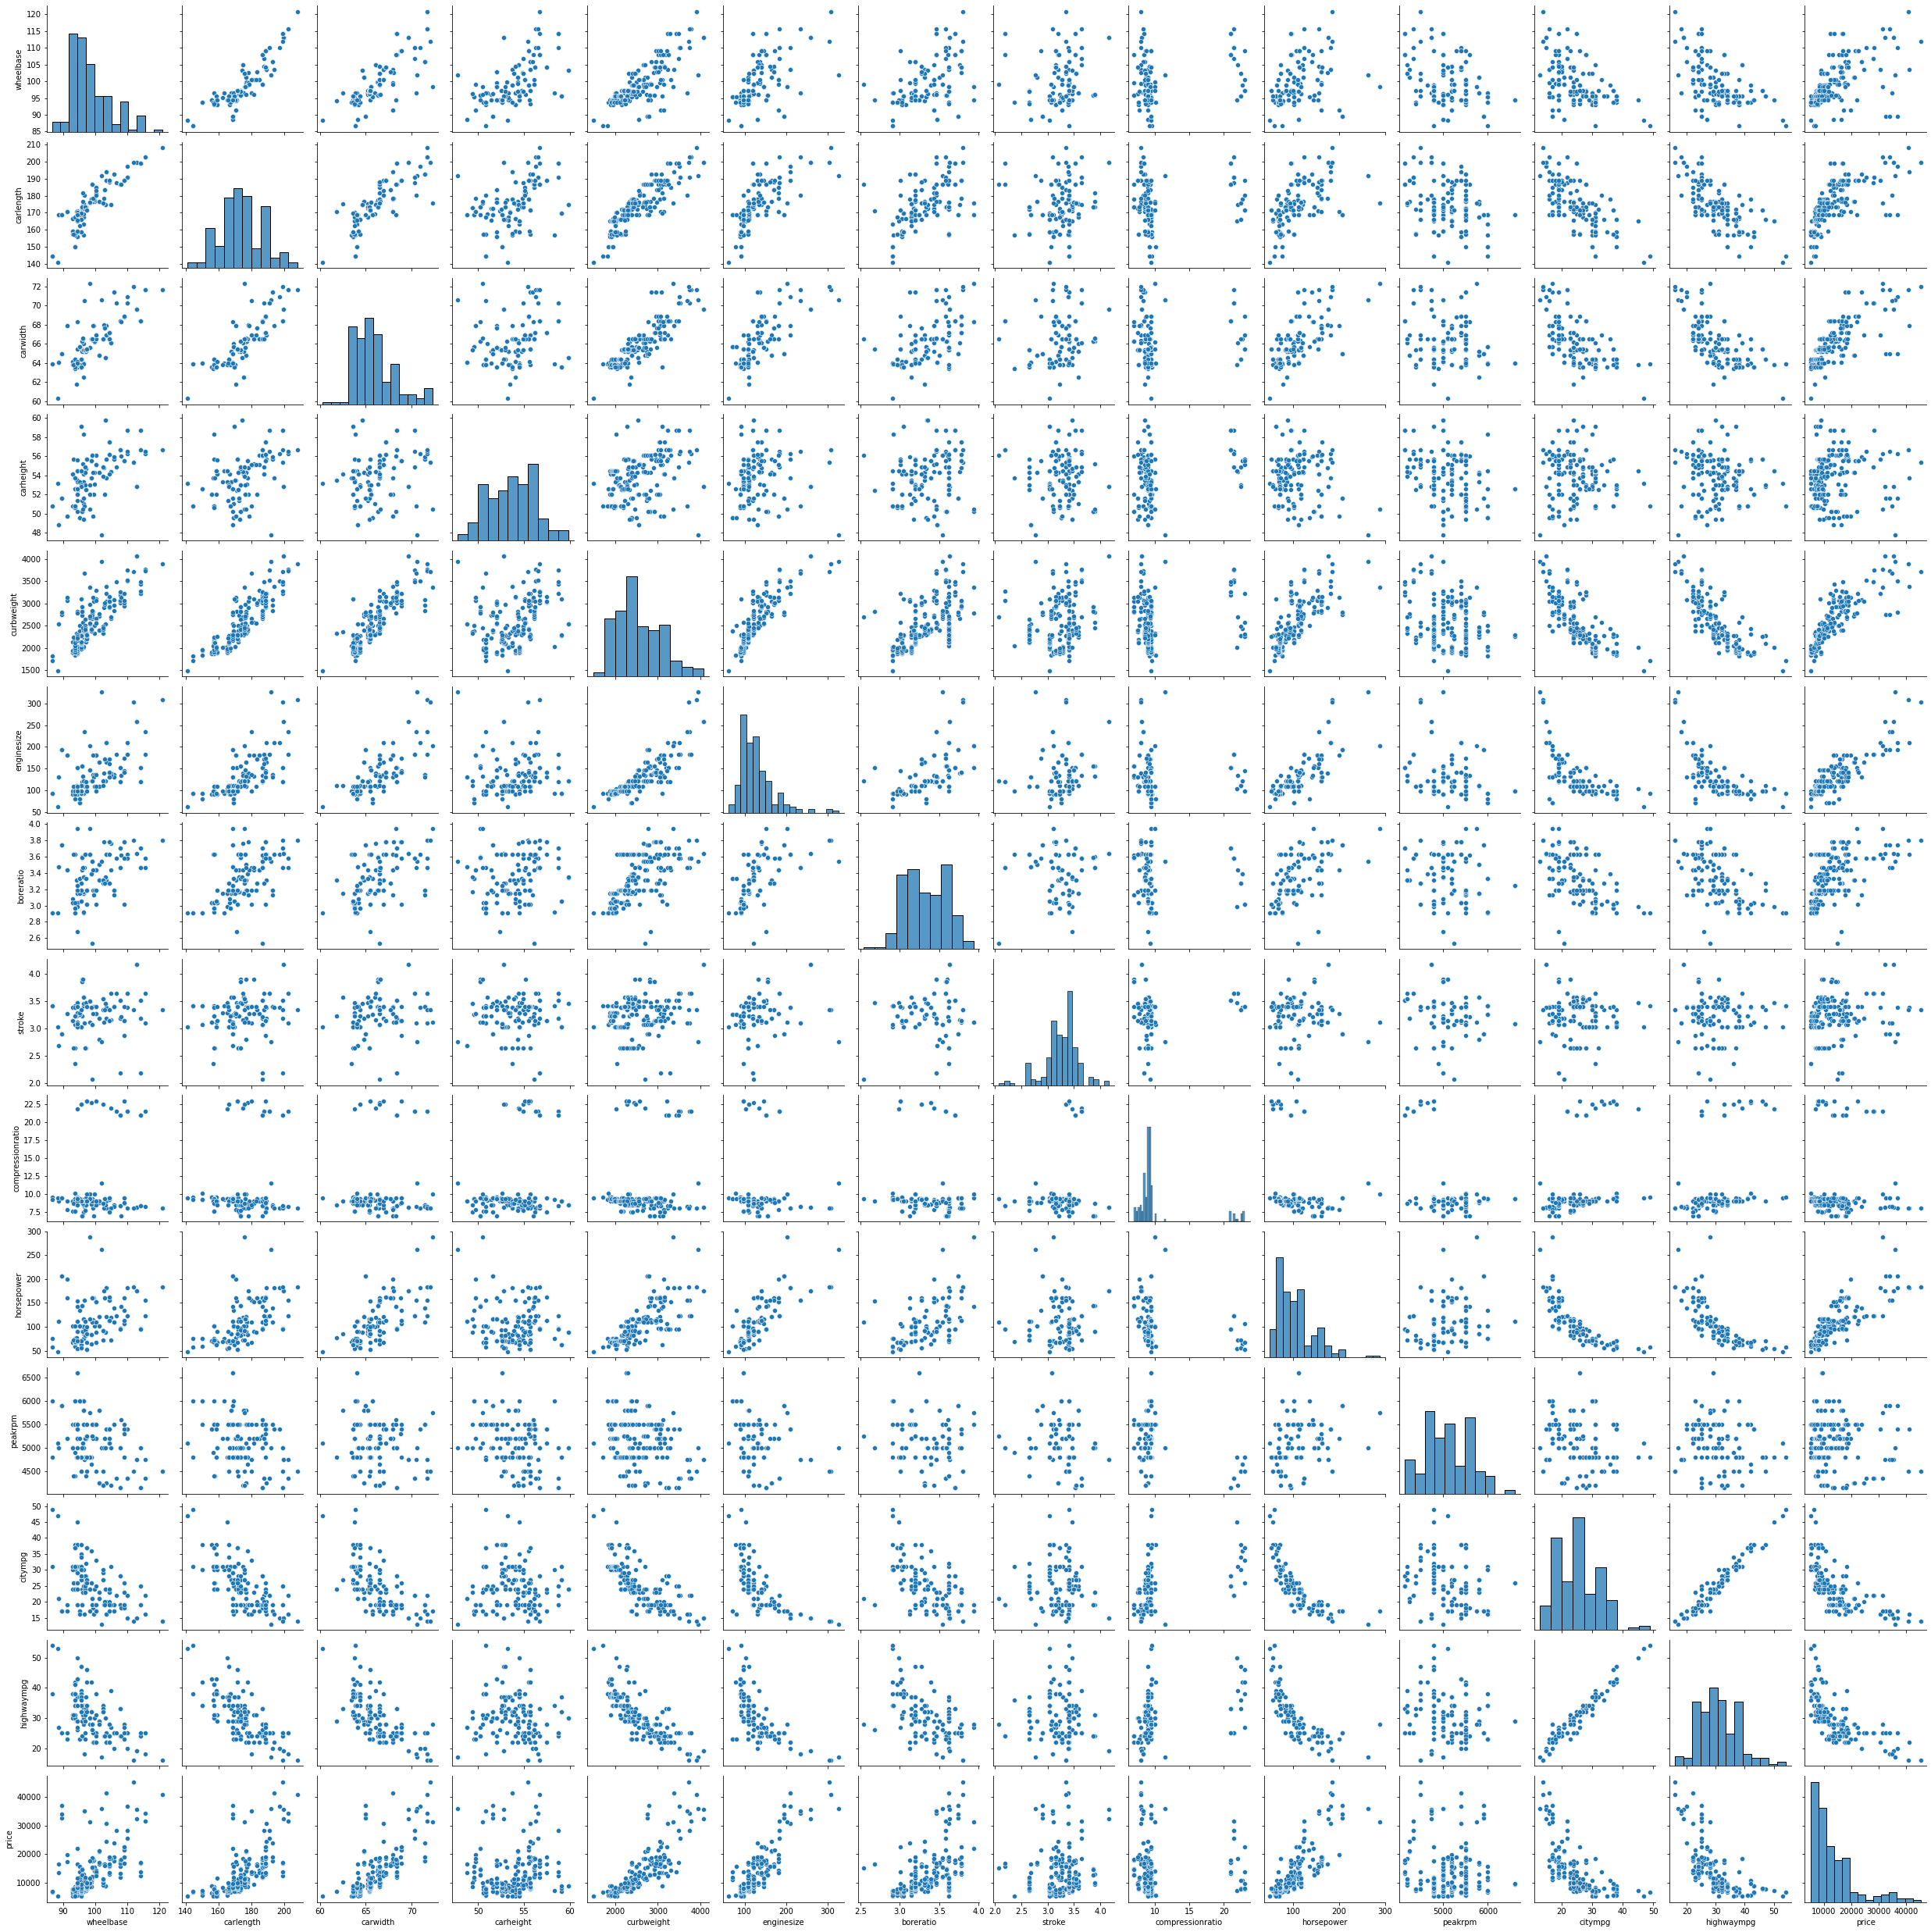

In [ ]:
sns.pairplot(cars_numeric)
plt.show()

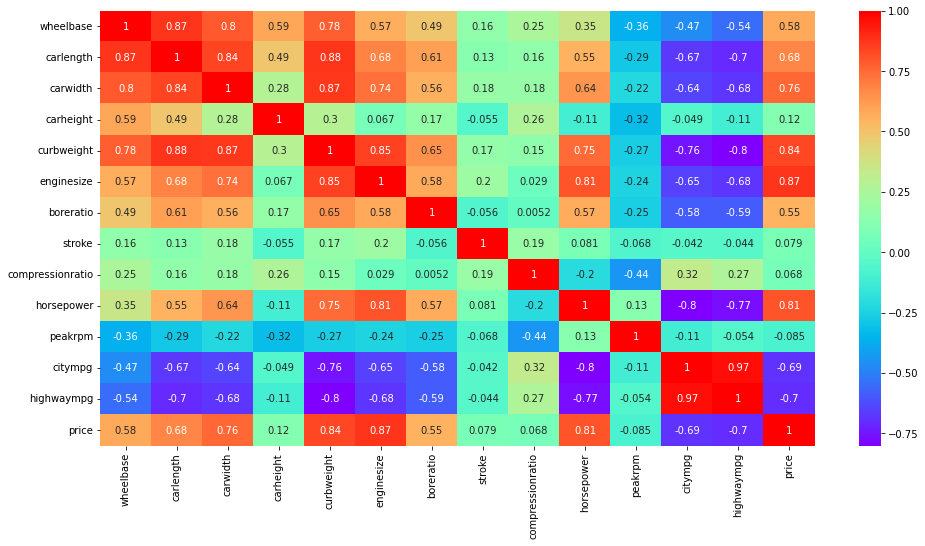

In [ ]:
plt.figure(figsize = (16, 8))

sns.heatmap(cars_numeric.corr(), cmap = 'rainbow', annot = True)
plt.show()

Based on the pairplot and the heatmap, price is highly correlated with wheelbase, carlength, carwidth, curbweight, enginesize, boreratio, horsepower, citympg and highwaympg.  
  
  
  


Many variables seems to be highly correlated. Therefore, we'll have to pay attention to multicolinearity especially for linear models such as linear regression and logistic regression which suffer more from multicolinearity.

#Data Cleaning

In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

No null values. We will change symboling variable to categorical variable as mentioned before.

In [ ]:
cars['symboling'] = cars['symboling'].astype('object')
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

Type of 'symboling' changed for int to object.

In [ ]:
cars['CarName'].value_counts()

toyota corona                      6
toyota corolla                     6
peugeot 504                        6
subaru dl                          4
mitsubishi mirage g4               3
mazda 626                          3
toyota mark ii                     3
mitsubishi outlander               3
mitsubishi g4                      3
honda civic                        3
volvo 264gl                        2
bmw 320i                           2
isuzu D-Max                        2
audi 100ls                         2
volvo 244dl                        2
porsche cayenne                    2
toyota corolla liftback            2
honda accord                       2
bmw x3                             2
volvo 144ea                        2
volvo 145e (sw)                    2
honda civic cvcc                   2
saab 99le                          2
toyota starlet                     2
saab 99gle                         2
toyota corolla 1200                2
mazda rx-4                         2
m

'CarName' represents the name of the car and the company names appear before the first space. We will extract the company name and assign it to carnames.

In [ ]:
carnames = cars['CarName'].apply(lambda x: x.split(' ')[0])
#띄어쓰기를 이용하여 x 분리, 분리 후 리스트 꼴로 반환됨. 그 중 첫번째 원소 즉 제일 첫번째 단어 할당

In [ ]:
carnames.head(30)
#노트북의 carnames[:30]과 동일

0     alfa-romero
1     alfa-romero
2     alfa-romero
3            audi
4            audi
5            audi
6            audi
7            audi
8            audi
9            audi
10            bmw
11            bmw
12            bmw
13            bmw
14            bmw
15            bmw
16            bmw
17            bmw
18      chevrolet
19      chevrolet
20      chevrolet
21          dodge
22          dodge
23          dodge
24          dodge
25          dodge
26          dodge
27          dodge
28          dodge
29          dodge
Name: CarName, dtype: object

Company names were extracted properly.

In [ ]:
cars['car_company'] = cars['CarName'].apply(lambda x: x.split(' ')[0])

In [ ]:
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

**Another way of splitting company names**

In [ ]:
import re
#정규표현식
p = re.compile(r'\w+-?\w+')
#정규식 패턴을 정규식 개체로 컴파일
#r: 문자열 앞에 r이 붙으면 해당 문자열이 구성된 그대로 문자열을 반환
#\: 뒤에 문자를 메타문자로 받아들일 것
#\w+: 알파벳이나 숫자가 1회 이상 연속으로 반복되는 부분
#-?: 물을표 앞의 표현식(-)이 0회 혹은 1회 등장
##이거 덕분에 alfa-romero 같은 회사도 옳게 분리가 됨
#w+: 다시 알파벳이나 숫자가 1회 이상 연속으로 반복되는 부분
carnames = cars['CarName'].apply(lambda x: re.findall(p, x)[0])
#x에서 p와 일치하는 문자열을 찾아 첫번째 개체 할당

In [ ]:
cars['car_company'] = cars['CarName'].apply(lambda x: re.findall(p, x)[0])

In [ ]:
cars['car_company'].astype('category').value_counts()

toyota         31
nissan         17
mazda          15
honda          13
mitsubishi     13
subaru         12
peugeot        11
volvo          11
dodge           9
volkswagen      9
buick           8
bmw             8
plymouth        7
audi            7
saab            6
isuzu           4
porsche         4
chevrolet       3
jaguar          3
alfa-romero     3
vw              2
renault         2
maxda           2
porcshce        1
toyouta         1
vokswagen       1
mercury         1
Nissan          1
Name: car_company, dtype: int64

Some company names are misspelled.  
vw, vokswagen = volkswagen  
maxda = mazda  
porcshce = porsche  
toyouta = toyota  
Nissan = nissan

In [ ]:
#volkswagen
cars.loc[(cars['car_company'] == 'vw') | (cars['car_company'] == 'vokswagen'), 
         'car_company'] = 'volkswagen'
#cars중의 cars['car_company']가 vw 또는 vokswagen인 행 중에서 열이 car_company인 경우 그 값을
#'volkswagen'으로 재할당


#mazda
cars.loc[cars['car_company'] == 'maxda', 'car_company'] = 'mazda'


#porsche
cars.loc[cars['car_company'] == 'porcshce', 'car_company'] = 'porsche'


#toyota
cars.loc[cars['car_company'] == 'toyouta', 'car_company'] = 'toyota'


#nissan
cars.loc[cars['car_company'] == 'Nissan', 'car_company'] = 'nissan'

In [ ]:
cars['car_company'].astype('category').value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
buick           8
bmw             8
audi            7
plymouth        7
saab            6
porsche         5
isuzu           4
jaguar          3
chevrolet       3
alfa-romero     3
renault         2
mercury         1
Name: car_company, dtype: int64

Everything looks fine now. Let's drop the car name variable.


In [ ]:
cars = cars.drop('CarName', axis = 1)

No more 'CarName' instead we have 'car_company'.

In [ ]:
cars.describe().T

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17
compressionratio,205.0,10.142537,3.972040,7.00,8.60,9.00,9.40,23.00


In [ ]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

#Data Preparation

##Predictor variable과 Target variable 분리

In [ ]:
y = cars['price']
X = cars.drop(['price', 'car_ID'], axis = 1)

# X = cars.loc[:, ['symboling', 'fueltype', 'aspiration', 'doornumber',
#        'carbody', 'drivewheel', 'enginelocation', 'wheelbase', 'carlength',
#        'carwidth', 'carheight', 'curbweight', 'enginetype', 'cylindernumber',
#        'enginesize', 'fuelsystem', 'boreratio', 'stroke', 'compressionratio',
#        'horsepower', 'peakrpm', 'citympg', 'highwaympg',
#        'car_company']]

# y = cars['price']
#노트북의 위 코드 대체

##Creating dummy variables for categorical variables

In [ ]:
cars_categorical = X.select_dtypes(include = ['object'])
cars_categorical.head()

,symboling,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem,car_company
0,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
1,3,gas,std,two,convertible,rwd,front,dohc,four,mpfi,alfa-romero
2,1,gas,std,two,hatchback,rwd,front,ohcv,six,mpfi,alfa-romero
3,2,gas,std,four,sedan,fwd,front,ohc,four,mpfi,audi
4,2,gas,std,four,sedan,4wd,front,ohc,five,mpfi,audi


In [ ]:
cars_dummies = pd.get_dummies(cars_categorical, drop_first = True)
#get k-1 dummies out of k categorical levels by removing the first level.
cars_dummies.head()

,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
0,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
#drop categorical variables and replace it with dummy variables
X = X.drop(list(cars_categorical.columns), axis = 1)
X = pd.concat([X, cars_dummies], axis = 1)

##Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 100)

In [ ]:
X_train

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,93.7,167.3,63.8,50.8,2191,98,2.97,3.230,9.40,68,5500,31,38,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,94.5,168.9,68.3,50.2,2778,151,3.94,3.110,9.50,143,5500,19,27,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,94.5,168.7,64.0,52.6,2300,98,3.24,3.080,9.40,112,6600,26,29,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,88.6,168.8,64.1,48.8,2548,130,3.47,2.680,9.00,111,5000,21,27,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,104.3,188.8,67.2,57.5,3157,130,3.62,3.150,7.50,162,5100,17,22,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
190,94.5,165.7,64.0,51.4,2221,109,3.19,3.400,8.50,90,5500,24,29,0,0,0,0,1,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
96,94.5,165.3,63.8,54.5,1971,97,3.15,3.290,9.40,69,5200,31,37,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
177,102.4,175.6,66.5,53.9,2458,122,3.31,3.540,8.70,92,4200,27,32,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
181,104.5,187.8,66.5,54.1,3151,161,3.27,3.350,9.20,156,5200,19,24,1,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
97,94.5,170.2,63.8,53.5,2037,97,3.15,3.290,9.40,69,5200,31,37,0,0,1,0,0,1,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


##Standardizing

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

#Hands on Machine Learning p.169 WARNING
##It is important to scale the data (e.g., using a StandardScaler) before performing 
##Ridge Regression, as it is sensitive to the scale of the input features. 
##This is true of most regularized models.

X_train[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']] = scaler.fit_transform(X_train[['wheelbase', 
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginesize',
       'boreratio', 'stroke', 'compressionratio', 'horsepower', 'peakrpm', 'citympg', 
       'highwaympg']])     
X_train.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
122,-0.811836,-0.487238,-0.924500,-1.134628,-0.642128,-0.660242,-1.297329,-0.064443,-0.172569,-0.872898,0.771349,0.839773,1.025419,0,0,1,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
125,-0.677177,-0.359789,1.114978,-1.382026,0.439415,0.637806,2.432256,-0.449757,-0.146125,1.021826,0.771349,-0.957048,-0.557490,0,0,0,0,1,1,0,1,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
166,-0.677177,-0.375720,-0.833856,-0.392434,-0.441296,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,0,0,1,0,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,-1.670284,-0.367754,-0.788535,-1.959288,0.015642,0.123485,0.625138,-1.830463,-0.278345,0.213410,-0.271212,-0.657578,-0.557490,0,0,0,0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
199,0.972390,1.225364,0.616439,1.627983,1.137720,0.123485,1.201877,-0.321319,-0.675002,1.501822,-0.062699,-1.256518,-1.276993,1,0,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [ ]:
X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']]=scaler.transform(X_test[['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg']])
X_test.head()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,symboling_-1,symboling_0,symboling_1,symboling_2,symboling_3,fueltype_gas,aspiration_turbo,doornumber_two,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginelocation_rear,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,cylindernumber_five,cylindernumber_four,cylindernumber_six,cylindernumber_three,cylindernumber_twelve,cylindernumber_two,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,car_company_audi,car_company_bmw,car_company_buick,car_company_chevrolet,car_company_dodge,car_company_honda,car_company_isuzu,car_company_jaguar,car_company_mazda,car_company_mercury,car_company_mitsubishi,car_company_nissan,car_company_peugeot,car_company_plymouth,car_company_porsche,car_company_renault,car_company_saab,car_company_subaru,car_company_toyota,car_company_volkswagen,car_company_volvo
160,-0.475189,-0.566894,-0.652569,-0.227502,-0.820850,-0.660242,-0.451443,-0.706633,-0.278345,-0.822372,-0.688236,1.887918,2.320526,0,1,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
186,-0.205872,-0.136752,-0.154030,0.885789,-0.487359,-0.390836,-0.451443,0.481417,-0.278345,-0.443427,0.250069,0.240833,0.449816,0,0,0,1,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
59,0.046613,0.349149,0.299187,0.061129,-0.284685,-0.072447,0.317543,0.449308,-0.384120,-0.468690,-0.688236,0.091098,0.162014,0,0,1,0,0,1,0,1,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
165,-0.677177,-0.375720,-0.833856,-0.392434,-0.505784,-0.660242,-0.259197,-0.546085,-0.172569,0.238673,3.064983,0.091098,-0.269688,0,0,1,0,0,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
140,-0.879165,-1.283797,-0.924500,0.885789,-0.551846,-0.415328,1.201877,-1.958901,-0.357676,-0.746583,-1.522285,0.091098,0.018113,0,0,0,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


#Model Building and Evaluation

##Ridge Regression

In [ ]:
# list of alphas to tune
#The hyperparameter α controls how much you want to regularize the model.
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}

ridge = Ridge()

folds = 5
model_cv = GridSearchCV(estimator = ridge, param_grid = params,
                        scoring = 'neg_mean_absolute_error', cv = folds, 
                        return_train_score = True, verbose = 1)

#verbose: Controls the verbosity: the higher, the more messages.
##>1 : the computation time for each fold and parameter candidate is displayed;
##>2 : the score is also displayed;
##>3 : the fold and candidate parameter indexes are also displayed together with 
##the starting time of the computation.
##Therefore, 

#return_train_score default=False
##If False, the cv_results_ attribute will not include training scores. 
##Computing training scores is used to get insights on how different parameter 
##settings impact the overfitting/underfitting trade-off. However computing the 
##scores on the training set can be computationally expensive and is not strictly 
##required to select the parameters that yield the best generalization performance.

model_cv.fit(X_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [ ]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_alpha,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.012585,0.005744,0.004460,0.002336,0.0001,{'alpha': 0.0001},-2477.083675,-1407.576709,-1533.518285,-3791.731153,-2497.319067,-2341.445778,856.840716,25,-695.255755,-813.927025,-831.944178,-903.579372,-719.996190,-792.940504,76.244164
1,0.007327,0.002745,0.003022,0.000237,0.001,{'alpha': 0.001},-2469.022890,-1401.288430,-1548.374451,-3713.626872,-2504.226460,-2327.307821,829.157764,24,-700.093123,-812.600052,-828.560213,-901.408299,-718.693748,-792.271087,74.231396
2,0.010849,0.001722,0.004769,0.002628,0.01,{'alpha': 0.01},-2436.292716,-1373.845123,-1591.757067,-3391.885995,-2511.618168,-2261.079814,722.131565,23,-722.499208,-820.506751,-820.217414,-888.118643,-713.906682,-793.049740,65.986464
3,0.006686,0.003355,0.002974,0.000210,0.05,{'alpha': 0.05},-2344.179515,-1380.655182,-1520.650406,-3163.025924,-2436.840308,-2169.070267,653.048016,21,-749.228751,-851.223162,-848.597643,-894.907014,-744.953476,-817.782009,60.032866
4,0.004389,0.000787,0.002862,0.000014,0.1,{'alpha': 0.1},-2352.853355,-1392.596625,-1444.148287,-3010.512654,-2361.823807,-2112.386946,615.030673,20,-772.824695,-883.854455,-900.993508,-921.751361,-783.102278,-852.505260,62.120321


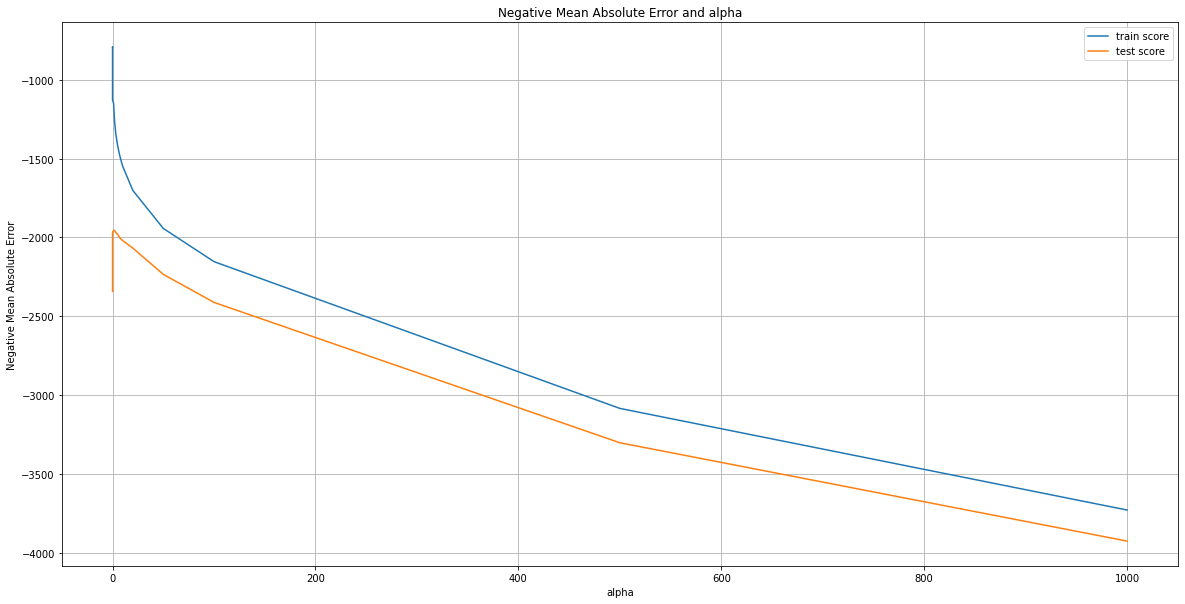

In [ ]:
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')
#소수 부분 제외 정수로 반환

plt.figure(figsize = (20, 10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title('Negative Mean Absolute Error and alpha')
plt.legend(['train score', 'test score'], loc = 'upper right')
plt.show()

Train score와의 Test score의 MAE는 alpha가 커짐에 따라 지속적으로 커지는 양상을 띈다

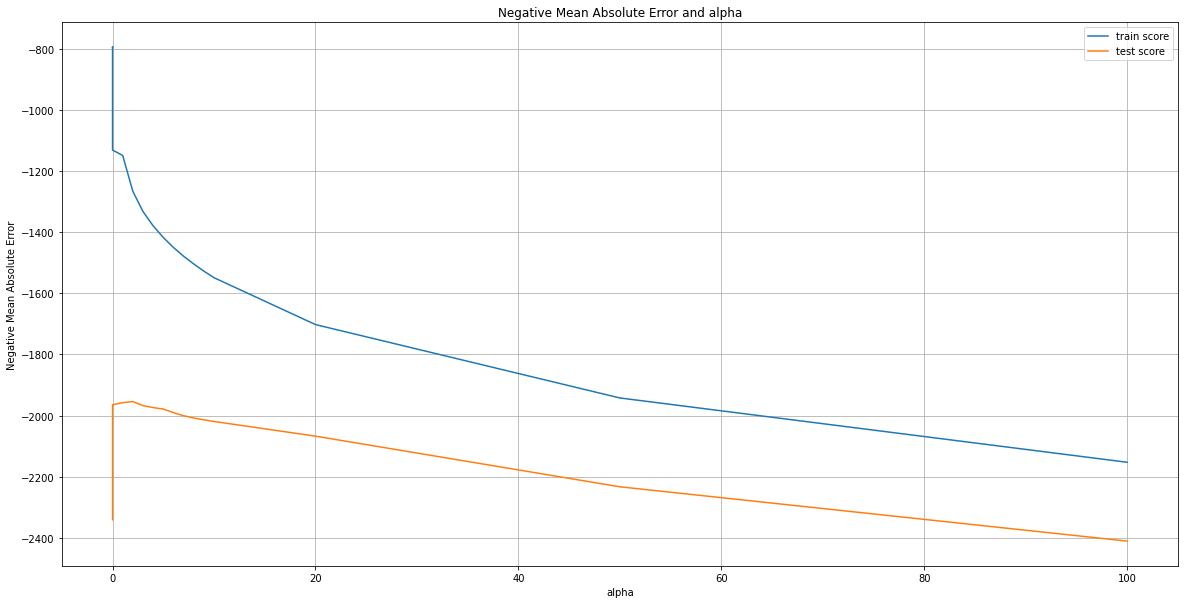

In [ ]:
cv_results = cv_results[cv_results['param_alpha'] <= 200]
#위의 코드와 동일하지만 param_alpha의 값이 200이하인 값들로만 plot그려보기
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int')


plt.figure(figsize=(20,10))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.grid()
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper right')
plt.show()

In [ ]:
alpha = 15
ridge = Ridge(alpha = alpha)
ridge.fit(X_train, y_train)
ridge.coef_

array([  352.16468118,  -146.31068684,  1194.67022283,    27.78778914,
        1429.62952602,  2256.96590742,    29.1039829 ,  -474.1817189 ,
         355.5905822 ,  1404.32742061,   283.28271375,   -41.39042541,
           6.20477009,   192.75145206,  -107.6273446 ,   -57.39385931,
         -42.41200026,   450.43702116,  -154.17843273,   105.27387696,
         372.17070885,   364.85883559,  -734.13285583,   153.42519164,
        -439.15250392,  -707.929286  ,   856.52537661,   564.62477053,
         -37.91842608,  -393.50098189,  1072.69646241,    79.73919937,
        -571.84042031,   194.61820917,    93.53681569, -1363.78978861,
         330.20010158,   261.87690122,  -165.50262539,   194.61820917,
         -13.63045317,    75.80726018,   154.17843273,     0.        ,
          95.78272675,  -264.85914201,     0.        ,    43.87442759,
        1593.82774427,   906.04858204,   213.52331376,   -80.28608982,
         -92.50505388,    66.05150816,   336.53928891,     5.07202944,
      

In [ ]:
imp_ridge = pd.DataFrame({'Varname': X_train.columns, 'Coefficient': ridge.coef_})
imp_ridge.sort_values(by = 'Coefficient', ascending = False)
#coefficient를 기준으로 내림차순으로 정렬

,Varname,Coefficient
5,enginesize,2256.965907
48,car_company_bmw,1593.827744
4,curbweight,1429.629526
9,horsepower,1404.327421
2,carwidth,1194.670223
30,enginetype_ohc,1072.696462
49,car_company_buick,906.048582
26,drivewheel_rwd,856.525377
61,car_company_porsche,652.749197
27,enginelocation_rear,564.624771


In [ ]:
imp_ridge = imp_ridge.drop([imp_ridge.index[56], imp_ridge.index[43], imp_ridge.index[46]])
#coefficien가 0인 것들 drop
imp_ridge.sort_values(by = 'Coefficient', ascending = False)

,Varname,Coefficient
5,enginesize,2256.965907
48,car_company_bmw,1593.827744
4,curbweight,1429.629526
9,horsepower,1404.327421
2,carwidth,1194.670223
30,enginetype_ohc,1072.696462
49,car_company_buick,906.048582
26,drivewheel_rwd,856.525377
61,car_company_porsche,652.749197
27,enginelocation_rear,564.624771


In [ ]:
y_pred = ridge.predict(X_test)

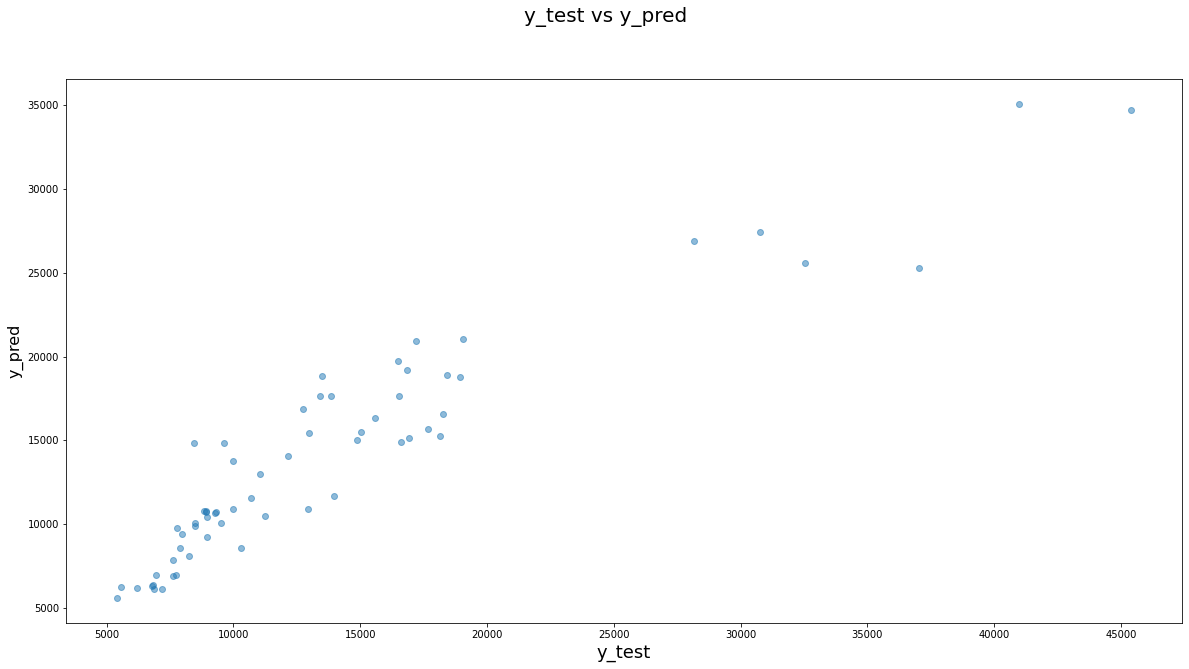

In [ ]:
fig = plt.figure(figsize = (20, 10))
plt.scatter(y_test, y_pred, alpha = 0.5)
fig.suptitle('y_test vs y_pred', fontsize = 20)
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)
plt.show()

In [ ]:
df = pd.DataFrame({'Actual': y_test, 'Predictions': y_pred})
#dictionary를 이용하여 dataframe을 만들면 key는 column name으로, value는 해당 column의 값으로 지정
df['Predictions'] = round(df['Predictions'], 2)
df.head()

,Actual,Predictions
160,7738.0,6958.92
186,8495.0,10070.69
59,8845.0,10758.38
165,9298.0,10691.31
140,7603.0,7866.12


In [ ]:
from sklearn import metrics

In [ ]:
metrics.explained_variance_score(y_test, y_pred)
#R-squared
##1 – (Sum of Squared Residuals / Total Variance) 
##== 1 - (Unexplained Variation / Total Variation)

#Explained Variance Score
##1 – ((Sum of Squared Residuals – Mean Error) / Total Variance)
##유일한 차이는 SSR에 Mean Error를 뺀다는것이다. 만약 모델이 얼추 제대로 맞추고 모델에서 나오는 오차는 
##별 트렌드없이 0을 기준으로 왔다갔다 한다면 둘의 값은 거의 비슷할것이다. 다만, 에러가 한쪽에 쏠려 있다거나 
##한다면 일단은 모델이 좀 편향되게 (잘못) 피팅이 되었다는 것이고 이는 Mean Error가 0에 가까운 값이 
#아닌 – 나 +를 띄게 된다.

#If R-squared and explained variance score differs, it means there exists bias in
#the error term, so it is not well fitted

0.856611861452632

In [ ]:
metrics.r2_score(y_test, y_pred)
#위의 explained varaince score와 큰 차이가 없는 것을 봐서 편향이 크지 않은 것으로 보임

0.8560052538582434

In [ ]:
metrics.mean_absolute_error(y_test, y_pred)
#np.mean(y_test)을 해보면 13784.967741935483이 나오는데, 
#이 때 MAE가 2185이면 에러가 너무 큰 것은 아닐까?

2185.0533154241793

In [ ]:
print('Accuracy on Train set: ', ridge.score(X_train, y_train))
print('Accuracy on Test set: ', ridge.score(X_test, y_test))
#노트북에는 없지만 한 번 해봄
#Accuracy랑 r-squared는 동일함
#우려와는 다르게 성능이 나쁜 것 같지는 않음.

##Classification에서 accuracy는 TP+TN / TP + TN + FP + FN으로 
##전체 데이터 중에 옳게 분류한 데이터의 수였음

Accuracy on Train set:  0.9047856382929581
Accuracy on Test set:  0.8560052538582434


In [ ]:
metrics.max_error(y_test, y_pred)

11718.330751503807

In [ ]:
metrics.mean_squared_error(y_test, y_pred)

10083821.965936743

In [ ]:
np.sqrt(metrics.mean_squared_error(y_test, y_pred))
#노트북에는 없지만 rmse도 구해봄

3175.5034192922453

In [ ]:
metrics.mean_squared_log_error(y_test, y_pred)

0.03258650638573036

In [ ]:
metrics.median_absolute_error(y_test, y_pred)

1628.756972601188

In [ ]:
metrics.mean_poisson_deviance(y_test,y_pred)

502.23381520751315

In [ ]:
metrics.mean_gamma_deviance(y_test,y_pred)

0.031020782591864794

In [ ]:
metrics.mean_tweedie_deviance(y_test,y_pred)

10083821.965936743